In [3]:
using Pkg

# Problem 1

In [5]:
a = c = 1
b = 1e8

1.0e8

In [9]:
discr = b^2 - 4*a*c

9.999999999999996e15

In [13]:
x₋ = (-b - sqrt(discr)) / (2*a)
x₊ = (-b + sqrt(discr)) / (2*a)

println("Quadratic formula: x₋ = ", x₋)
println("Quadratic formula: x₊ = ", x₊)

Quadratic formula: x₋ = -1.0e8
Quadratic formula: x₊ = -7.450580596923828e-9


In [23]:
🦍 = c / (a * x₋)
println("x₊x₋ relation: x₊ = ", 🦍)

x₊x₋ relation: x₊ = -1.0e-8


We see that the value of $x_-$ is stable when computed by the quadratic formula, since we're taking the difference of $-10^8 - (\textit{basically } 10^8)$ and dividing that by two to get $-10^8$. When we add $-10^8 + (\textit{basically } 10^8)$ though, that *basically* matters quite a bit, and the computational representation of the result gets messed up. When we instead compute the positive solution as $x_+ = \frac{c}{ax_-}$, we avoid the error we get trying to computationally resolve the difference between $10^8$ and $\sqrt{10^{16} - 4}$.

# Problem 2

In [ ]:
using Plots

In [24]:
f(x) = (1 - cos(x))/x^2

f (generic function with 1 method)

In [34]:
x_range = range(0.1, 10, 100)

0.1:0.1:10.0

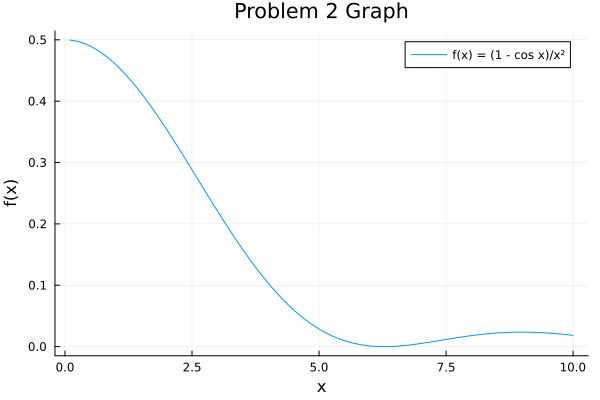

In [43]:
plot(x_range, f.(x_range), title = "Problem 2 Graph", label = "f(x) = (1 - cos x)/x²", xlabel = "x", ylabel = "f(x)")


Using L'Hopital's rule:
\begin{align*}
    \lim_{x \to 0} \frac{1-\cos x}{x^2} = \lim_{x \to 0} \frac{\sin x}{2x} = \frac{1}{2}
\end{align*}

In [48]:
f(1.2e-8)

0.7709882115452477

This result does not make sense. It exceeds the maximum value of the function, which we see visually to be 0.5. The error likely occurs from the denominator, as squaring and then dividing by the tiny number of $(1.2\times 10^{-8})^2$

We'll use the power reduction identity, where $\sin^2\left(\frac{x}{2}\right) = \frac{1}{2}(1 - \cos(x))$, which we can rearrange to find $\cos x = 1 - 2\sin^2\left(\frac{x}{2}\right)$. Plugging this in we get:

$$ f(x) = \frac{1-\left[1 - 2\sin^2\left(\frac{x}{2}\right)\right]}{x^2} = \frac{2\sin^2\left(\frac{x}{2}\right)}{\left(\frac{x}{2}\right)^2 \cdot 4} = \frac{1}{2}\left(\frac{\sin(x/2)}{(x/2)}\right)^2$$

In [53]:
new_f(x) = (2*sin(x/2) / x)^2 / 2
new_f(1.2e-8)

0.5

This is exactly the analytically expected value as $x\to 0$.

# Problem 3

In [54]:
t = [0, 5, 10, 15, 20, 25, 30]
v = [0.0, 111.8, 225.1, 351.9, 519.2, 702.6, 897.7]

7-element Vector{Float64}:
   0.0
 111.8
 225.1
 351.9
 519.2
 702.6
 897.7

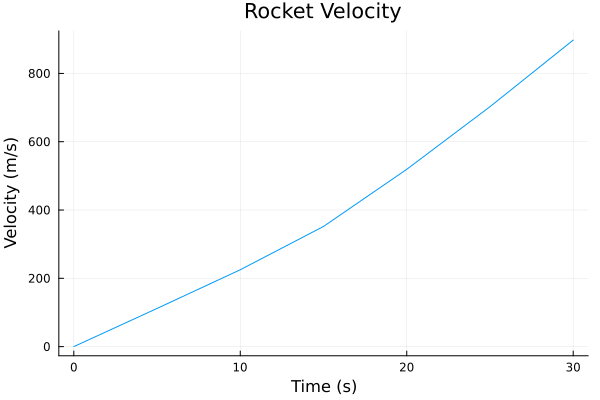

In [60]:
plot(t, v, title="Rocket Velocity", xlabel="Time (s)", ylabel = "Velocity (m/s)", label="")

In [80]:
function forward_difference(v_ls, t_ls)
    """
    Forward difference implementation. Returns derivative of provided function along with new t series.
    """
    max_index = length(v_ls) - 1
    derivative_ls = zeros(Float64, max_index)
    for i ∈ 1:max_index
        h = t_ls[i+1] - t_ls[i]
        derivative_ls[i] = (v_ls[i+1] - v_ls[i])/h 
    end
    return t_ls[1:max_index], derivative_ls
end

forward_difference (generic function with 1 method)

In [81]:
new_t, a = forward_difference(v,t)

([0, 5, 10, 15, 20, 25], [22.36, 22.66, 25.359999999999996, 33.460000000000015, 36.67999999999999, 39.02])

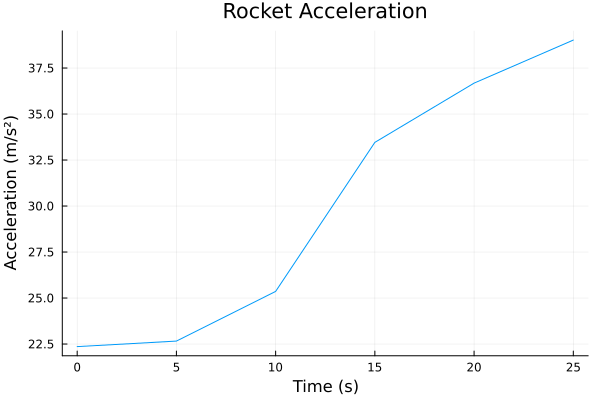

In [82]:
plot(new_t, a, title="Rocket Acceleration", xlabel="Time (s)", ylabel = "Acceleration (m/s²)", label="")

In [83]:
newer_t, j = forward_difference(a, new_t)

([0, 5, 10, 15, 20], [0.060000000000000143, 0.5399999999999991, 1.6200000000000039, 0.6439999999999955, 0.4680000000000021])

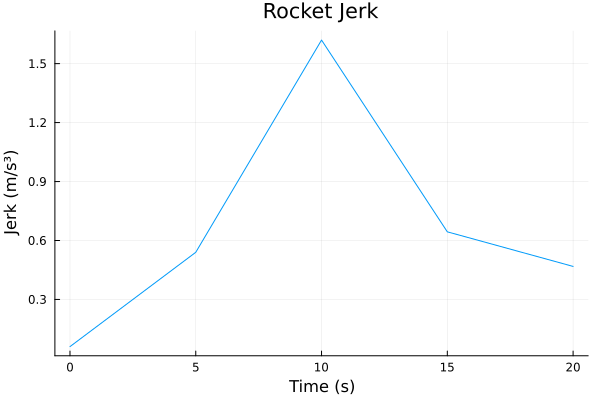

In [84]:
plot(newer_t, j, title="Rocket Jerk", xlabel="Time (s)", ylabel = "Jerk (m/s³)", label="")

In [86]:
println(maximum(j))

1.6200000000000039


# Problem 4

\begin{align*}
    f(x) &= \frac{1 - \cos x}{x^2} \\
    f'(x) &= \frac{x^2\sin x - 2x(1 - \cos x)}{x^4} = \frac{x^2\sin x + 2x\cos x - 2x}{x^4} \\
    f''(x) &= \frac{x^4(2x\sin x + x^2\cos x + 2\cos x - 2x\sin x - 2) - 4x^3(x^2\sin x + 2x\cos x - 2x)}{x^8} \\
    &= \frac{x^4(x^2\cos x + 2\cos x - 2 - 4x\sin x - 8\cos x + 8)}{x^8} \\
    &= \frac{x^2\cos x - 4x\sin x - 6\cos x + 6}{x^4}
\end{align*}

In [88]:
f_double_prime(x) = (x^2*cos(x) - 4*x*sin(x) - 6*cos(x) + 6)/x^4

f_double_prime (generic function with 1 method)

In [90]:
f_double_prime(0.004)

-0.08333264633897385

In [122]:
h = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

6-element Vector{Float64}:
 0.1
 0.01
 0.001
 0.0001
 1.0e-5
 1.0e-6

From the course notes, the central difference approximation of the second derivative:
\begin{align*}
    f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{align*}

In [120]:
function second_central_diff(x, f, h)
    return (f(x + h) - 2*f(x) + f(x - h)) / h^2
end

second_central_diff (generic function with 1 method)

In [105]:
function second_deriv_error(x, f, h)
    return abs(f(x) - second_central_diff(x, f, h))
end

second_deriv_error (generic function with 1 method)

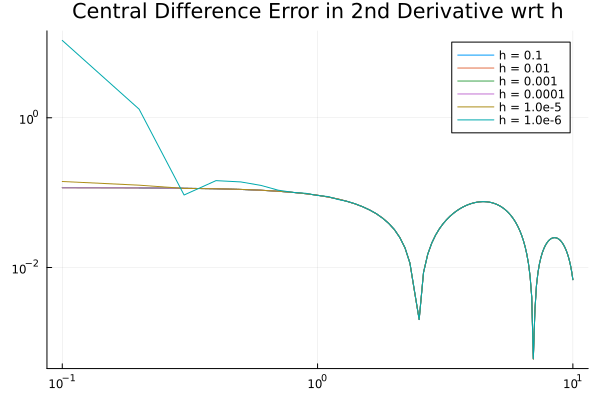

In [123]:
p = plot()
for hi in h
    plot!(p, x_range, second_deriv_error.(x_range, f_double_prime, hi),
          label = "h = $(hi)", xscale=:log10, yscale=:log10, title="Central Difference Error in 2nd Derivative wrt h")
end

display(p)

Using the other form of $f$ now, we find the second derivative as follows:
\begin{align*}
    f(x) &= \frac{2\sin^2\left(\frac{x}{2}\right)}{x^2} \\
    f'(x) &= \frac{2x^2\sin\left(\frac{x}{2}\right)\cos\left(\frac{x}{2}\right) - 
    8x\sin^2\left(\frac{x}{2}\right)}{x^4} \\
    f''(x) &= \frac{\left(\cos^{2}\left(\frac{x}{2}\right) - \sin^{2}\left(\frac{x}{2}\right)\right) x^{2} - 8 \cos\left(\frac{x}{2}\right) \sin\left(\frac{x}{2}\right) \, x + 12 \sin^{2}\left(\frac{x}{2}\right)}{x^{4}}
\end{align*}

In [126]:
f_different_double_prime(x) = (( (cos(x/2))^2 - (sin(x/2))^2)*x^2 - 8*cos(x/2)*sin(x/2) + 12*(sin(x/2))^2)/(x^4)

f_different_double_prime (generic function with 1 method)

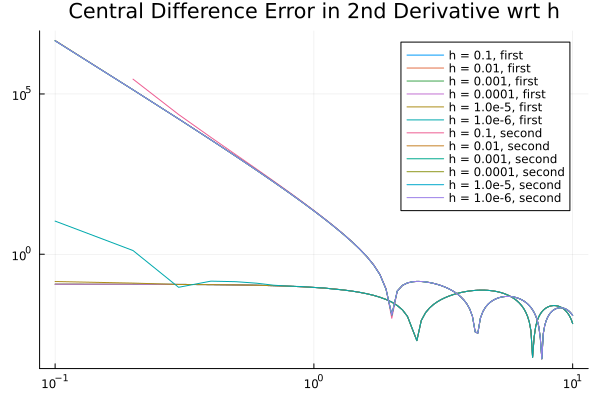

In [129]:
p = plot()
for hi in h
    plot!(p, x_range, second_deriv_error.(x_range, f_double_prime, hi),
          label = "h = $(hi), first")
end
for hi in h
    plot!(p, x_range, second_deriv_error.(x_range, f_different_double_prime, hi),
        label = "h = $(hi), second")
end
plot!(xscale=:log10, yscale=:log10, title="Central Difference Error in 2nd Derivative wrt h")

display(p)

A lot of those lines can't really be seen, but the first way of writing the second derivative function seemed to perform better, likely on account of having less and simpler terms.

# Problem 5

In [ ]:
x_range = range(0, 2*pi, 128)

128

In [135]:
f(x) = 2 + 5sin(x) + 0.1sin(30x)
g(x) = 2 + 5sin(x)

g (generic function with 1 method)

### (A)

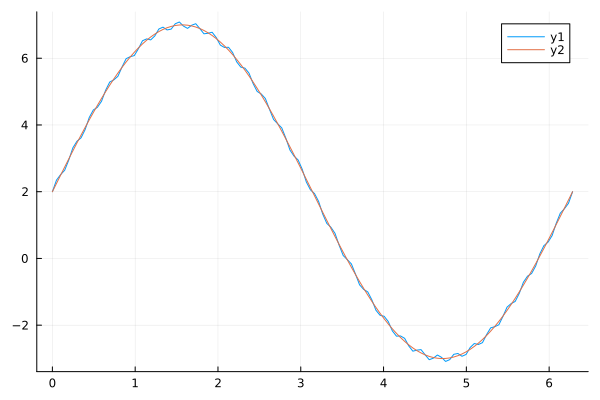

In [137]:
plot(x_range, f.(x_range))
plot!(x_range, g.(x_range))

### (B)

Analytically computing the derivatives, we find $f'(x) = 5\cos x + 3\sin(x)$ and $g'(x) = 5\cos x$

In [138]:
f_prime(x) = 5cos(x) + 3sin(x)
g_prime(x) = 5cos(x)

g_prime (generic function with 1 method)

In [149]:
diff_x = range(0, 2*pi, 129)
x2, f_fwd = forward_difference(f.(diff_x), collect(diff_x))

([0.0, 0.04908738521234052, 0.09817477042468103, 0.14726215563702155, 0.19634954084936207, 0.2454369260617026, 0.2945243112740431, 0.3436116964863836, 0.39269908169872414, 0.44178646691106466  …  5.792311455056181, 5.841398840268521, 5.890486225480862, 5.939573610693203, 5.988660995905543, 6.037748381117884, 6.086835766330224, 6.135923151542564, 6.1850105367549055, 6.234097921967246], [7.0253659430531945, 3.3560127277606706, 2.615001884881442, 6.09576018046526, 7.454252401593252, 4.1535596720246595, 2.0406019105978497, 4.798753509949605, 7.303471356442348, 4.867153725116422  …  4.867153725116376, 7.30347135644238, 4.798753509949619, 2.040601910597859, 4.153559672024634, 7.454252401593236, 6.095760180465308, 2.6150018848814396, 3.356012727760691, 7.02536594305315])

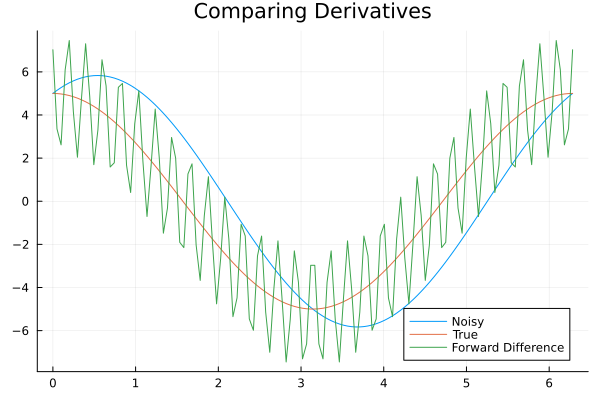

In [151]:
plot(x_range, f_prime.(x_range), label="Noisy")
plot!(x_range, g_prime.(x_range), label="True")
plot!(x_range, f_fwd, label="Forward Difference")
plot!(title = "Comparing Derivatives")

### (C)

In [159]:
function diff_fwd_diff(f_ls, x_ls)
    max_index = length(f_ls) - 2
    derivative_ls = zeros(Float64, max_index)
    for i ∈ 1:max_index
        h = x_ls[i+1] - x_ls[i]
        derivative_ls[i] = (f_ls[i+2] - f_ls[i])/(2*h) 
    end
    return derivative_ls
end

diff_fwd_diff (generic function with 1 method)

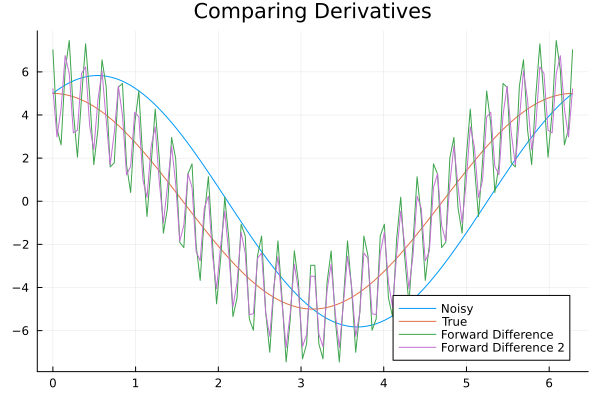

In [168]:
diff2_x = range(0, 2*pi, 130)
diff_deriv = diff_fwd_diff(f.(diff2_x), collect(diff2_x))

plot(x_range, f_prime.(x_range), label="Noisy")
plot!(x_range, g_prime.(x_range), label="True")
plot!(x_range, f_fwd, label="Forward Difference")
plot!(x_range, diff_deriv, label="Forward Difference 2")
plot!(title = "Comparing Derivatives")

In [166]:
function smooth(x, n)
    A = zeros(eltype(x), n, length(x))
    for i in 0:n-1
        A[i+1, :] .= circshift(x, i) 
    end
    smoothed = (sum(A, dims=1) ./ n)[:] 
    smoothed = circshift(smoothed, -div(n,2))
    return smoothed
end

smooth (generic function with 1 method)

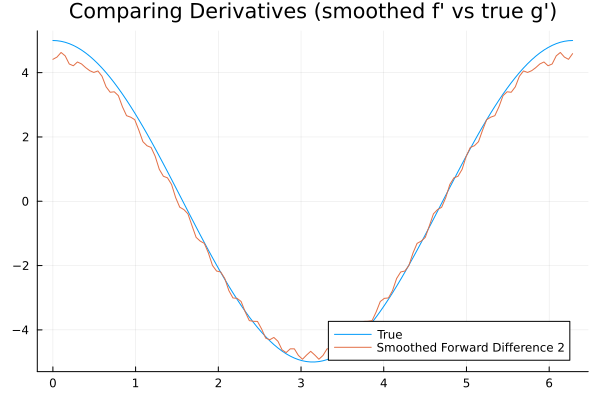

In [188]:
diff2_x = range(0, 2*pi, 130)
diff_deriv = diff_fwd_diff(smooth(f.(diff2_x), 20), collect(diff2_x))

plot(x_range, g_prime.(x_range), label="True")
#plot!(x_range, f_fwd, label="Old Forward Difference")
plot!(x_range, diff_deriv, label="Smoothed Forward Difference 2")
plot!(title = "Comparing Derivatives (smoothed f' vs true g')")